# Background

This notebook contains some background information: results from the literature as it exists now.

In [2]:
# generic imports for rest of notebook
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import scipy

## Existing literature

The following code summarizes the results I found in the papers cited at the end of this block, as well as from a model created by Noah Benson from pilot data that Catherine Olsson had gatherd (both members of the Winawer lab; see [next section](#Olsson-/-Benson-model) for details of the model). The data from the following papers was summarized by hand and is presented in the following figure as a summary.

- Sasaki, Y., Hadjikhani, N., Fischl, B., Liu, A. K., Marret, S., Dale, A. M., & Tootell, R. B. (2001). Local and global attention are mapped retinotopically in human occipital cortex. Proceedings of the National Academy of Sciences, 98(4), 2077–2082.

- Henriksson, L., Nurminen, L., Hyv\"arinen, Aapo, & Vanni, S. (2008). Spatial frequency tuning in human retinotopic visual areas. Journal of Vision, 8(10), 5. http://dx.doi.org/10.1167/8.10.5

- Kay, K. N., Naselaris, T., Prenger, R. J., & Gallant, J. L. (2008). Identifying Natural Images From Human Brain Activity. Nature, 452(7185), 352–355. http://dx.doi.org/10.1038/nature06713

- Hess, R. F., Li, X., Mansouri, B., Thompson, B., & Hansen, B. C. (2009). Selectivity as well as sensitivity loss characterizes the cortical spatial frequency deficit in amblyopia. Human Brain Mapping, 30(12), 4054–4069. http://dx.doi.org/10.1002/hbm.20829

- Kay, K. N. (2011). Understanding Visual Representation By Developing Receptive-Field Models. Visual Population Codes: Towards a Common Multivariate Framework for Cell Recording and Functional Imaging, (), 133–162.

- D'Souza, D. V., Auer, T., Frahm, J., Strasburger, H., & Lee, B. B. (2016). Dependence of chromatic responses in v1 on visual field eccentricity and spatial frequency: an fmri study. JOSA A, 33(3), 53–64.

- Farivar, R., Clavagnier, S., Hansen, B. C., Thompson, B., & Hess, R. F. (2017). Non-uniform phase sensitivity in spatial frequency maps of the human visual cortex. The Journal of Physiology, 595(4), 1351–1363. http://dx.doi.org/10.1113/jp273206

In [40]:
data_dict = {
    'Paper': ['Sasaki (2001)',]*7,
    'Optimum SF (cpd)': [1.25, .9, .75, .7, .6, .5, .4],
    'Eccentricity': [0, 1, 2, 3, 4, 5, 12]
}
data_dict['Paper'].extend(['Henriksson (2008)', ]*5)
data_dict['Optimum SF (cpd)'].extend([1.2, .68, .46, .40, .18])
data_dict['Eccentricity'].extend([1.7, 4.7, 6.3, 9, 19])

data_dict['Paper'].extend(['Kay (2008)']+['Kay (2011)']*5)
data_dict['Optimum SF (cpd)'].extend([4.5, 4, 3, 10, 10, 2])
data_dict['Eccentricity'].extend([ 2.9, 2.5, 4, .5, 1.5, 7])

data_dict['Paper'].extend(["Hess (dominant eye, 2009)"]*3)
data_dict['Optimum SF (cpd)'].extend([2.25, 1.9, 1.75])
data_dict['Eccentricity'].extend([2.5, 5, 10])

data_dict['Paper'].extend([ "D'Souza (2016)",]*3)
data_dict['Optimum SF (cpd)'].extend([2, .95, .4])
data_dict['Eccentricity'].extend([1.4, 4.6, 9.8])

data_dict['Paper'].extend(['Farivar (2017)']*2)
data_dict['Optimum SF (cpd)'].extend([3, 1.5,])
data_dict['Eccentricity'].extend([.5, 3])

data_dict['Paper'].extend([ 'Olsson (pilot, model fit)']*10)
data_dict['Optimum SF (cpd)'].extend([2.11, 1.76, 1.47, 2.75, 1.24, 1.06, .88, .77, .66, .60])
data_dict['Eccentricity'].extend([2, 3, 4, 1, 5, 6, 7, 8, 9, 10])

df = pd.DataFrame(data_dict)
df = df.sort(['Paper','Eccentricity',])

/home/billbrod/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:31: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


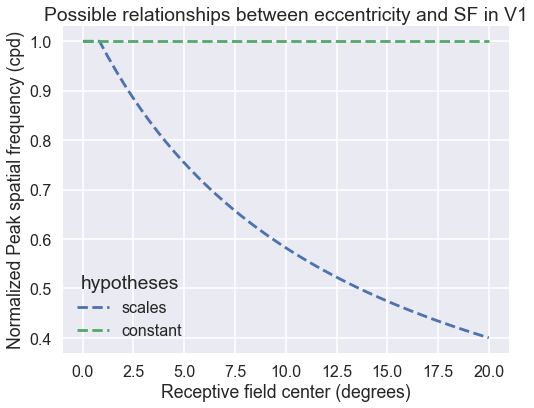

In [3]:
ecc = np.linspace(.01, 20, 50)
V1_RF_size = np.concatenate([np.ones(len(ecc[ecc<.5])), np.linspace(1, 2.5, len(ecc[ecc>=.5]))])
#V2_RF_size = np.concatenate([2*np.ones(len(ecc[ecc<4])), np.linspace(2, 2.5, len(ecc[ecc>=4]))])

with sns.plotting_context('poster', font_scale=1):
    # because this doesn't represent data, just intuition, we use this.
#    with plt.xkcd():
    x = np.linspace(.01, 20, 50)
    y = []
    fig, axes = sns.plt.subplots(1,1, figsize=(8,6))
    ax = axes
    # this gives intuitive plots, currently we want the possible hypotheses instead
#         for i in range(3):
#             y.append(10/(x+2)+i)
#             ax.plot(x, y[-1],  label='V%s'%(i+1), color=['r','g','b'][i])
    ax.plot(ecc, 1/V1_RF_size, '--', label='scales')
    ax.plot(ecc, np.ones(len(ecc)), '--', label='constant')
#        ax.set_ylim((0,8))
    ax.set_xlabel("Receptive field center (degrees)")
    ax.set_ylabel("Normalized Peak spatial frequency (cpd)")
    ax.set_title("Possible relationships between eccentricity and SF in V1")

    sns.plt.legend(title="hypotheses", loc='best')
    ax.figure.savefig('hypotheses.svg', bbox_inches='tight')

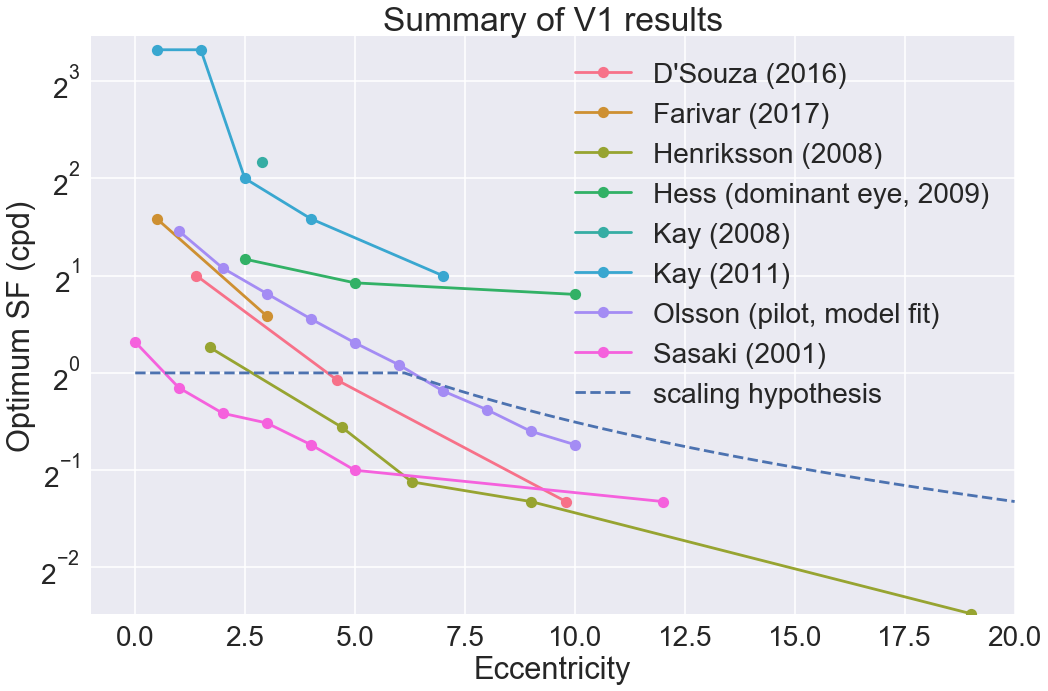

In [42]:
with sns.plotting_context('poster', font_scale=1.75):
    g = sns.FacetGrid(df, hue='Paper', size=10, aspect=1.5)
    g.map(plt.semilogy, 'Eccentricity', 'Optimum SF (cpd)', marker='o', basey=2)
    g.ax.set_xlim((-1, 20))
    g.ax.set_ylim((0, 11))
    g.ax.plot(ecc, 1/V1_RF_size, '--', label='scaling hypothesis')
    g.ax.legend(loc='best')
    g.ax.set_title("Summary of V1 results")
    g.savefig('Summary.svg')

## Olsson / Benson model

Noah Benson created this model based on pilot data that Catherine Olsson had gathered and it showed up in his VSS 2017 presentation about the Standard Cortical Observer model. It's a log-Gaussian fit to data not shown here.

In [9]:
c = [2.52529, 1.57448, .453992, .252451, .293989]
freqs = np.linspace(.25, 6, 100)
ecc = np.linspace(1,10, 10)
sensitivity = []
for r in ecc:
    sensitivity.append(c[0]/freqs * np.exp(-.5 * ((np.log(freqs)-(c[1]+r**c[2]))/(c[3]+r**c[4]))**2))
    print("For eccentricity %s, peak sensitivity at frequency %s"%(r, freqs[np.argmax(sensitivity[-1])]))
sensitivity = np.array(sensitivity)

For eccentricity 1.0, peak sensitivity at frequency 2.74747474747
For eccentricity 2.0, peak sensitivity at frequency 2.10858585859
For eccentricity 3.0, peak sensitivity at frequency 1.7601010101
For eccentricity 4.0, peak sensitivity at frequency 1.4696969697
For eccentricity 5.0, peak sensitivity at frequency 1.23737373737
For eccentricity 6.0, peak sensitivity at frequency 1.06313131313
For eccentricity 7.0, peak sensitivity at frequency 0.888888888889
For eccentricity 8.0, peak sensitivity at frequency 0.772727272727
For eccentricity 9.0, peak sensitivity at frequency 0.656565656566
For eccentricity 10.0, peak sensitivity at frequency 0.598484848485


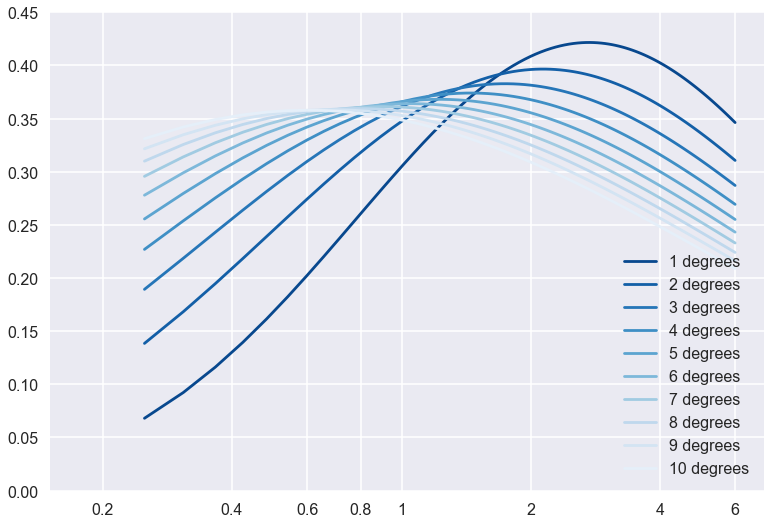

In [10]:
with sns.plotting_context("poster"):
    pal = sns.palettes.color_palette('Blues_r', 10)
    fig, ax = plt.subplots()
    for i, d in enumerate(sensitivity):
        ax.semilogx(freqs, d, color=pal[i], label='%s degrees' % (i+1))
    freq_floor = .75
    # ax.plot([freq_floor, freq_floor], [.1, .45], 'k--')
    # ax.plot([4*freq_floor, 4*freq_floor], [.1, .45], 'k--')
    ax.set_xlim((.15, 7))
    ax.set_ylim((0, .45))
    plt.legend(loc='lower right')
    _=plt.xticks([.2, .4, .6, .8, 1, 2, 4, 6,], [.2, .4, .6, .8, 1, 2, 4, 6,])

# Predictions

This section of the notebook contains some mocked-up plots to show our predictions for how our measured spatial frequency tuning curves will look. Note that these represent the "generic hypothesis" and we'll almost certainly find some sort of quantitative divergence from them. They are presented here because they help explain why we created the stimuli that we did.

The first plots we show are 2d histograms, showing voxel response as a function of eccentricity and spatial period. We expect the preferred spatial frequency to drop as the inverse of eccentricity. We show two possibilities: all voxels are bandpass (preferring a range of frequencies, bandwidth increases with eccentricity) and all voxels are highpass (all respond to the high frequencies, but the min frequency increases with eccentricity). We expect bandpass is more likely, based on existing literature.

Note that you should not pay too much attention to the numbers here, only to the general trends (i.e., we have no strong predictions on *what* particular frequency a voxel whose pRF lies at 3 degrees will prefer).

In [4]:
# to show this is not real data or model output or anything (just made up), we use xkcd style graphs
#sns.plt.xkcd()
sns.set_context("notebook")

base_freqs = np.round([2**i for i in np.arange(2.5, 8, .5)])
# want this to be linear
base_freqs = np.linspace(base_freqs[0], base_freqs[-1], 100)
ecc = range(2, 15)
df = pd.DataFrame(index=pd.MultiIndex.from_product([ecc, base_freqs]))
df = df.reset_index().rename(columns={'level_0': "eccentricity (degrees)", 'level_1': "spatial frequency (cpd)"})

def get_bp_resp(x):
    N = scipy.stats.norm(250/x['eccentricity (degrees)']**.7, 2*x['eccentricity (degrees)'])
    return N.pdf(x['spatial frequency (cpd)'])
df["bp response"] = df.apply(get_bp_resp, 1)
df["bp normalized response"] = df.groupby("eccentricity (degrees)")['bp response'].apply(lambda x: x/x.max())

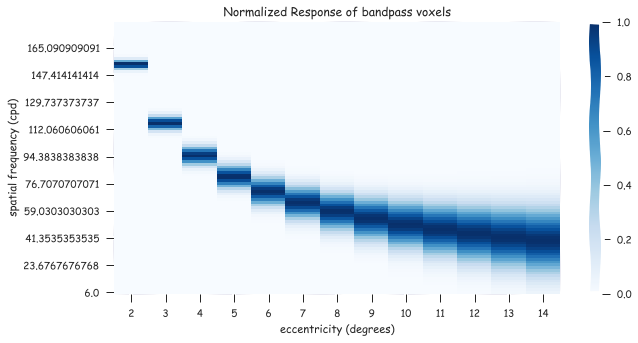

In [353]:
fig = sns.plt.figure(figsize=(10,5))
tmp = df.pivot("spatial frequency (cpd)", "eccentricity (degrees)", "bp normalized response")
ax = sns.heatmap(tmp, cmap='Blues', xticklabels=ecc, yticklabels=10)
ax.invert_yaxis()
ax.set_title("Normalized Response of bandpass voxels")

In [372]:
def get_hp_resp(x):
    N = scipy.stats.norm(170, 12*x['eccentricity (degrees)'])
    return N.pdf(x['spatial frequency (cpd)'])
df["hp response"] = df.apply(get_hp_resp, 1)
df["hp normalized response"] = df.groupby("eccentricity (degrees)")['hp response'].apply(lambda x: x/x.max())

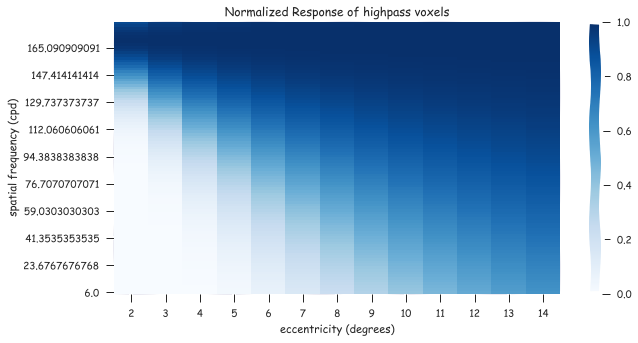

In [365]:
fig = sns.plt.figure(figsize=(10,5))
tmp = df.pivot("spatial frequency (cpd)", "eccentricity (degrees)", "hp normalized response")
ax = sns.heatmap(tmp, cmap='Blues', xticklabels=ecc, yticklabels=10)
ax.invert_yaxis()
ax.set_title("Normalized Response of highpass voxels")

1d slices through these can also be helpful. And we see that the bandpass voxels keep the same shape, but increase in bandwidth and decrease in mean as the eccentricity increases.

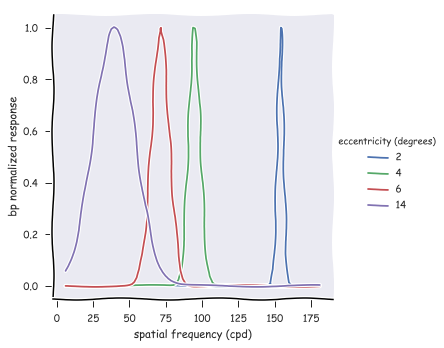

In [368]:
g = sns.FacetGrid(df[df["eccentricity (degrees)"].isin([2,4, 6, 14])], hue="eccentricity (degrees)", size=5)
g.map(sns.plt.plot, "spatial frequency (cpd)", "bp normalized response")
g.add_legend()

As you will see in the next notebook, our stimuli are constructed in a very specific way. The rationale behind them is that there's a lawful and relatively straightforward relationship between the spatial frequency tuning of a voxel and the position of its pRF in the visual field, which can be inferred from the plots in the prediction section above as well as in the existing results in the literature. Our stimuli encode this relationship by having a certain spatial frequency at the center of the image (what we call the **base frequency**), and the local frequency in the image then drops as you move from the center of the image towards the edge. The rate at which it drops is the same in each image: the frequency scales with the reciprocal of the distance from the image center.

This gives us another way to present our predictions: instead of plotting versus spatial frequency, we can plot versus the base frequency. The basic prediction then is that each voxel's tuning curve will be identical with respect to the base frequency (that is, each voxel across eccentricities in a given visual area will respond identically to one of our stimuli), because the rate at which our stimuli's local spatial frequencies change is identical to the rate at which the voxel's spatial frequency preferences change.

This is the basic hypothesis around which we set up our experiment, and we are looking for the deviations from this hypothesis that will inevitably arise (maybe the scaling of the spatial frequencies isn't quite correct or there's a ceiling).

In [5]:
# The hypothesis is: they all have the same response to the base frequency
df['base frequency (cpd)'] = df['spatial frequency (cpd)']
def get_base_resp(x):
    N = scipy.stats.norm(250/6**.7, 2*6)
    return N.pdf(x['base frequency (cpd)'])
df['response to base frequency'] = df.apply(get_base_resp, 1)
df['Normalized response to base frequency'] = df['response to base frequency'] / df['response to base frequency'].max()

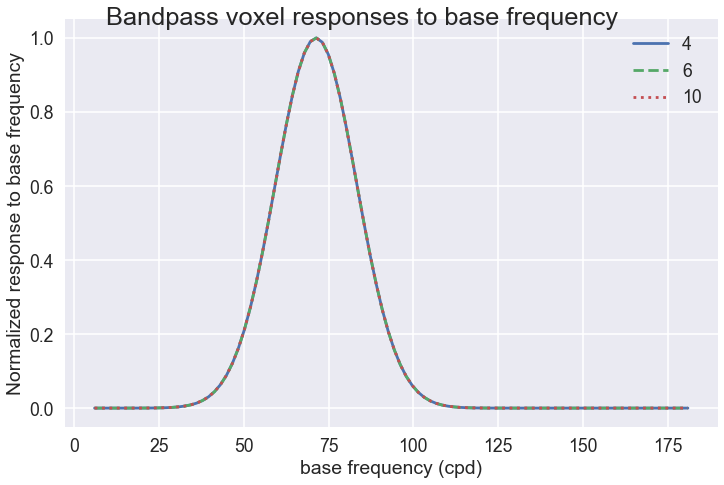

In [6]:
# and thus they're all ont op of each other
with sns.plotting_context('poster', font_scale=1.1):
    g = sns.FacetGrid(hue='eccentricity (degrees)',# y='response', x='base frequency (cpd)', 
                      data=df[df["eccentricity (degrees)"].isin([4, 6, 10])], 
                      size=7, aspect=1.5, hue_kws={'linestyle': ['-', '--', ':']})
    g.map(sns.plt.plot, 'base frequency (cpd)', 'Normalized response to base frequency')
    g.ax.legend()
    g.fig.suptitle("Bandpass voxel responses to base frequency")
    g.savefig('bandpass_response.svg')

And looking at this as a heatmap, we see the following

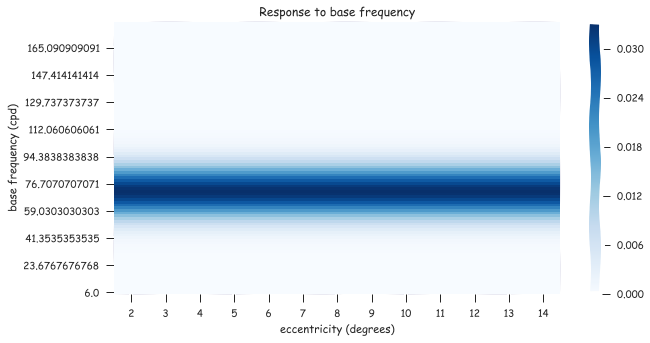

In [458]:
fig = sns.plt.figure(figsize=(10,5))
tmp = df.pivot("base frequency (cpd)", "eccentricity (degrees)", "response to base frequency")
ax = sns.heatmap(tmp, cmap='Blues', xticklabels=ecc, yticklabels=10)
ax.invert_yaxis()
ax.set_title("Response to base frequency")

# Spatial frequency examples

In [4]:
import pyPyrTools as ppt
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import Image
from scipy import ndimage
import sys
sys.path.append('..')
import sfp

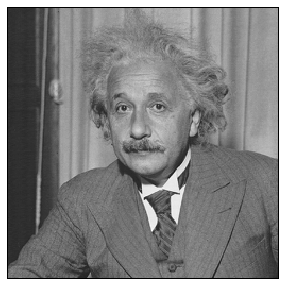

In [10]:
im = np.array(Image.open('/home/billbrod/Documents/pyPyrTools/pyPyrTools/einsteinCorrect.pgm'))

fig = plt.figure(figsize=(5,5))
ax = sfp.utils.im_plot(im)
fig.savefig('einstein.svg')

In [4]:
pyr = ppt.Lpyr(im, height=7)


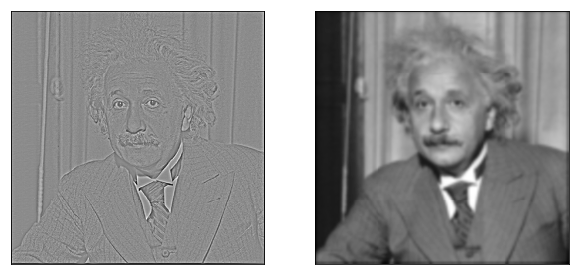

In [14]:
ims = [pyr.band(0), pyr.reconPyr(range(1,7))]
fig, axes = plt.subplots(1,2, figsize=(10,5))
for i, ax in enumerate(axes.flatten()):
    sfp.im_plot(ims[i], ax=ax)
fig.savefig('einsteinSF-two.svg')

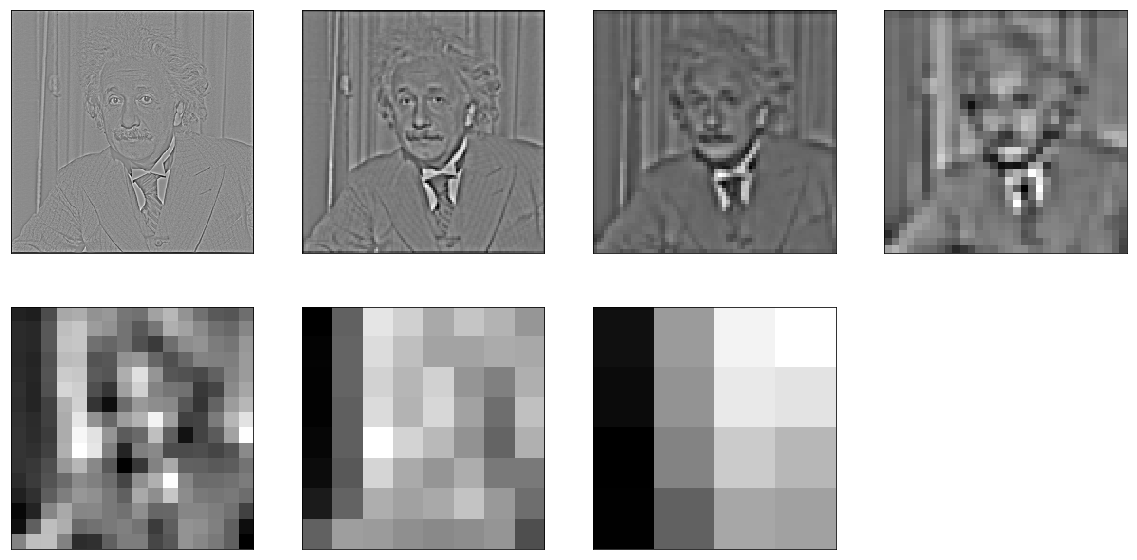

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))
for i, ax in enumerate(axes.flatten()):
    if i<pyr.nbands():
        sfp.im_plot(pyr.band(i), ax=ax)
    else:
        ax.set_visible(False)

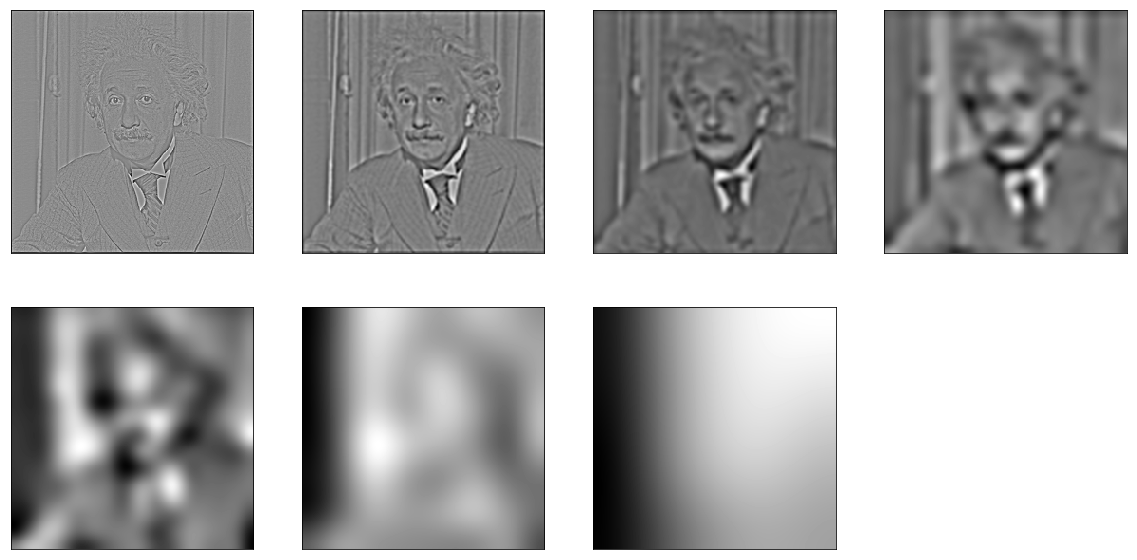

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))
ims = []
for i, ax in enumerate(axes.flatten()):
    if i<pyr.nbands():
        ims.append(ndimage.zoom(pyr.band(i), 2**i)/float(2**i))
        sfp.im_plot(ims[-1], ax=ax)
    else:
        ax.set_visible(False)
fig.savefig('einsteinSF.svg')

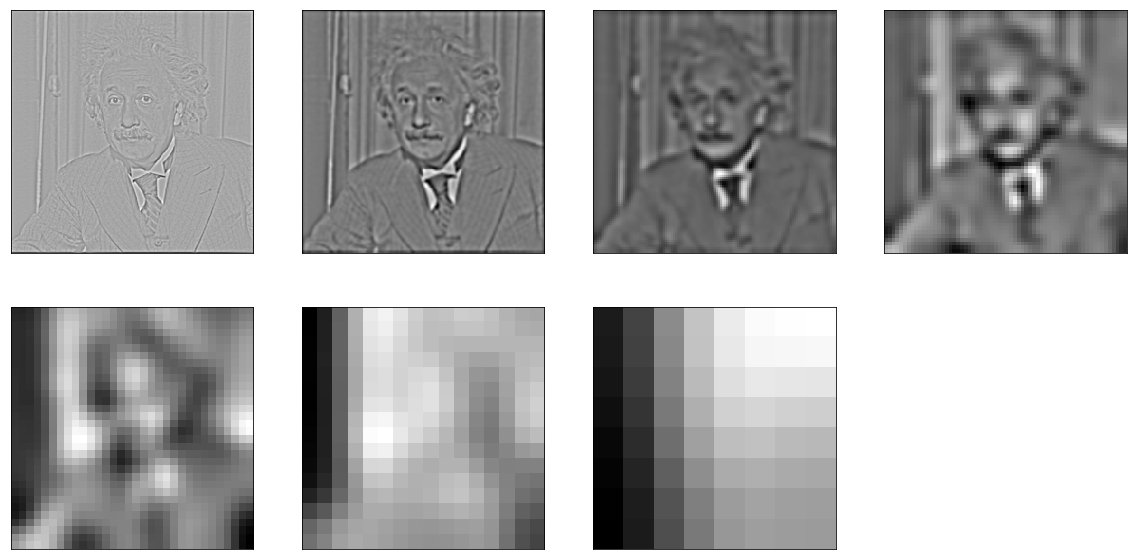

In [9]:
# This is what is actually used in reconPyr, up-sampling by a factor of two and adding as you go
filt = ppt.namedFilter('binom5')

fig, axes = plt.subplots(2, 4, figsize=(20,10))
ims = []
for i, ax in enumerate(axes.flatten()):
    if i<pyr.nbands():
        hi = ppt.upConv(pyr.band(i), filt, step=(2,1))
        ims.append(ppt.upConv(hi, filt.T, step=(1,2)))
        sfp.im_plot(ims[-1], ax=ax)
    else:
        ax.set_visible(False)
fig.savefig('einsteinSF.svg')

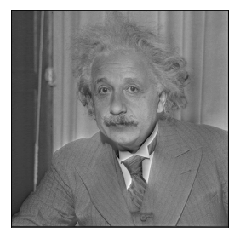

In [15]:
ims = np.array(ims)
# this doesn't work because the scaling is off
sfp.im_plot(ims.sum(0))

## Cells as filter examples

In [5]:
import pyPyrTools as ppt
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import Image
from scipy import ndimage
import sys
sys.path.append('..')
import sfp
from scipy.ndimage import filters as sfilts

(256, 256)


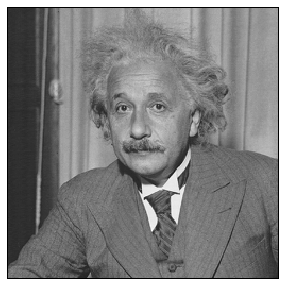

In [6]:
im = np.array(Image.open('/home/billbrod/Documents/pyPyrTools/pyPyrTools/einsteinCorrect.pgm'))
print im.shape

fig = plt.figure(figsize=(5,5))
ax = sfp.utils.im_plot(im)
fig.savefig('einstein.svg', bbox_inches='tight')

In [7]:
def create_circle_mask(x, y, rad, size):
    x_grid = np.array(range(size))
    x_grid, y_grid = np.meshgrid(x_grid, x_grid)
    mask = np.zeros((size, size))
    mask[(x_grid - x)**2 + (y_grid - y)**2 <= rad**2] = 1
    return mask

In [34]:
cell_dict = {0: 'Foveal cell', 1: 'Near-foveal cell', 2: 'Peripheral cell'}

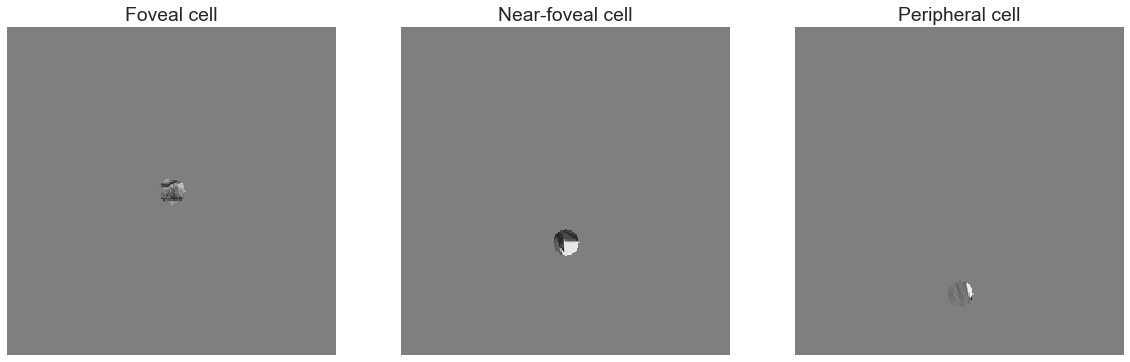

In [39]:
cells_view = []
for i in range(3):
    mask = create_circle_mask(128, 128+i*40, 10, 256)
    tmp = im*mask
    tmp[tmp==0] += 127
    cells_view.append(tmp)

with sns.plotting_context('poster'):
    fig, axes = plt.subplots(1, 3, figsize=(20,10))
    for i, ax in enumerate(axes):
        sfp.utils.im_plot(cells_view[i], vmin=0, vmax=255, ax=ax)
        ax.set_title(cell_dict[i])
    fig.savefig('Cells_no_change.svg', bbox_inches='tight')

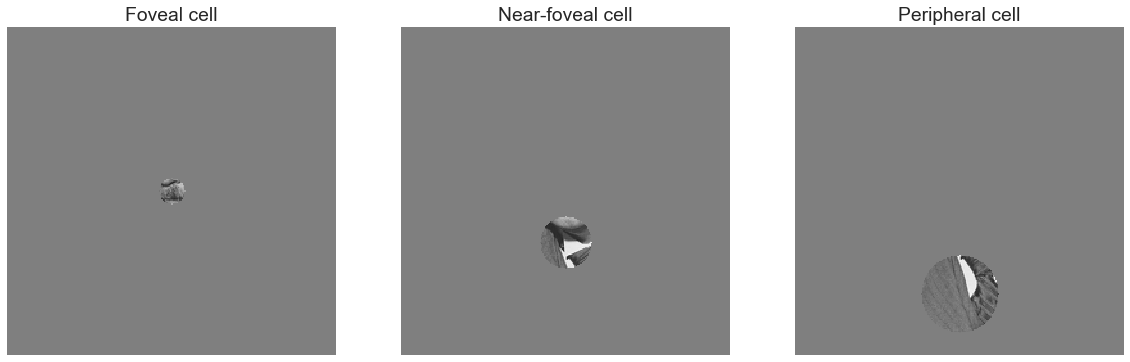

In [40]:
cells_view = []
for i in range(3):
    mask = create_circle_mask(128, 128+i*40, 10*(i+1), 256)
    tmp = im*mask
    tmp[tmp==0] += 127
    cells_view.append(tmp)

with sns.plotting_context('poster'):
    fig, axes = plt.subplots(1, 3, figsize=(20,10))
    for i, ax in enumerate(axes):
        sfp.utils.im_plot(cells_view[i], vmin=0, vmax=255, ax=ax)
        ax.set_title(cell_dict[i])
    fig.savefig('Cells_size_scale.svg', bbox_inches='tight')

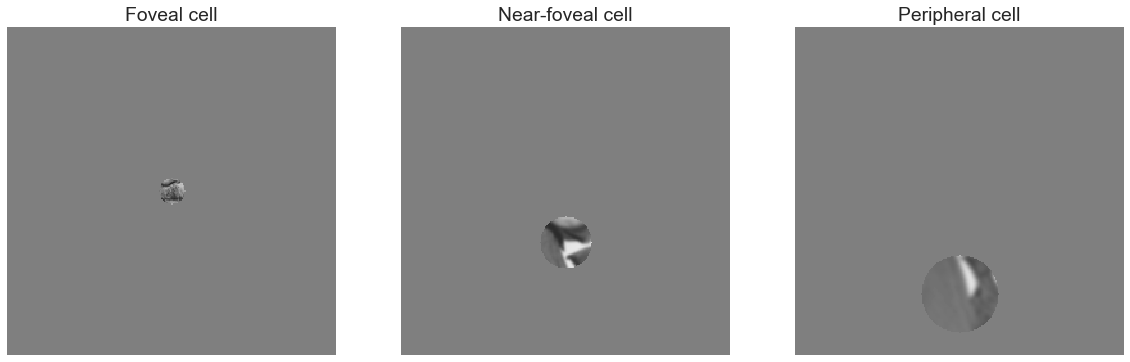

In [41]:
cells_view = []
for i in range(3):
    mask = create_circle_mask(128, 128+i*40, 10*(i+1), 256)
    tmp = sfilts.gaussian_filter(im, i)*mask
    tmp[tmp==0] += 127
    cells_view.append(tmp)

with sns.plotting_context('poster'):
    fig, axes = plt.subplots(1, 3, figsize=(20,10))
    for i, ax in enumerate(axes):
        sfp.utils.im_plot(cells_view[i], vmin=0, vmax=255, ax=ax)
        ax.set_title(cell_dict[i])
    fig.savefig('Cells_small_blur.svg', bbox_inches='tight')

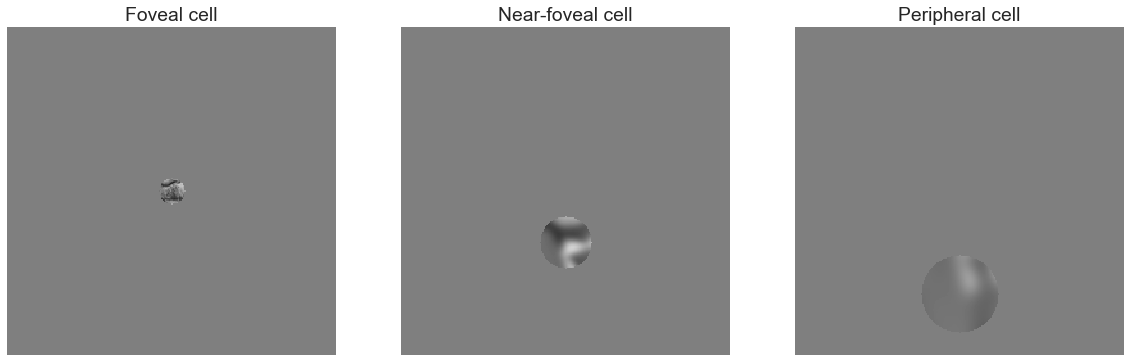

In [43]:
cells_view = []
for i in range(3):
    mask = create_circle_mask(128, 128+i*40, 10*(i+1), 256)
    tmp = sfilts.gaussian_filter(im, i*3)*mask
    tmp[tmp==0] += 127
    cells_view.append(tmp)

with sns.plotting_context('poster'):
    fig, axes = plt.subplots(1, 3, figsize=(20,10))
    for i, ax in enumerate(axes):
        sfp.utils.im_plot(cells_view[i], vmin=0, vmax=255, ax=ax)
        ax.set_title(cell_dict[i])
    fig.savefig('Cells_scaling_blur.svg', bbox_inches='tight')